# Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import Dataset

In [124]:
import zipfile
z = zipfile.ZipFile("/content/Credit-Score-Data.zip")
z.extractall()

In [125]:
df = pd.read_csv("/content/Credit Score Data/train.csv")

# Data Structure

In [126]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [127]:
df.shape

(100000, 28)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [129]:
df.duplicated().sum()

0

In [130]:
#check null values
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [131]:
#Delete unnecessary columns

df = df[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance", 'Credit_Score']]

df.head()


,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,265.0,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,Good,809.98,266.0,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,267.0,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,Good,809.98,268.0,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,Good,809.98,269.0,341.489231,Good


In [160]:
df.tail()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance,Credit_Score
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,2,502.38,378.0,479.866228,Poor
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,2,502.38,379.0,496.651610,Poor
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,2,502.38,380.0,516.809083,Poor
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,2,502.38,381.0,319.164979,Standard
99999,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,6.0,2,502.38,382.0,393.673696,Poor


# Visualization

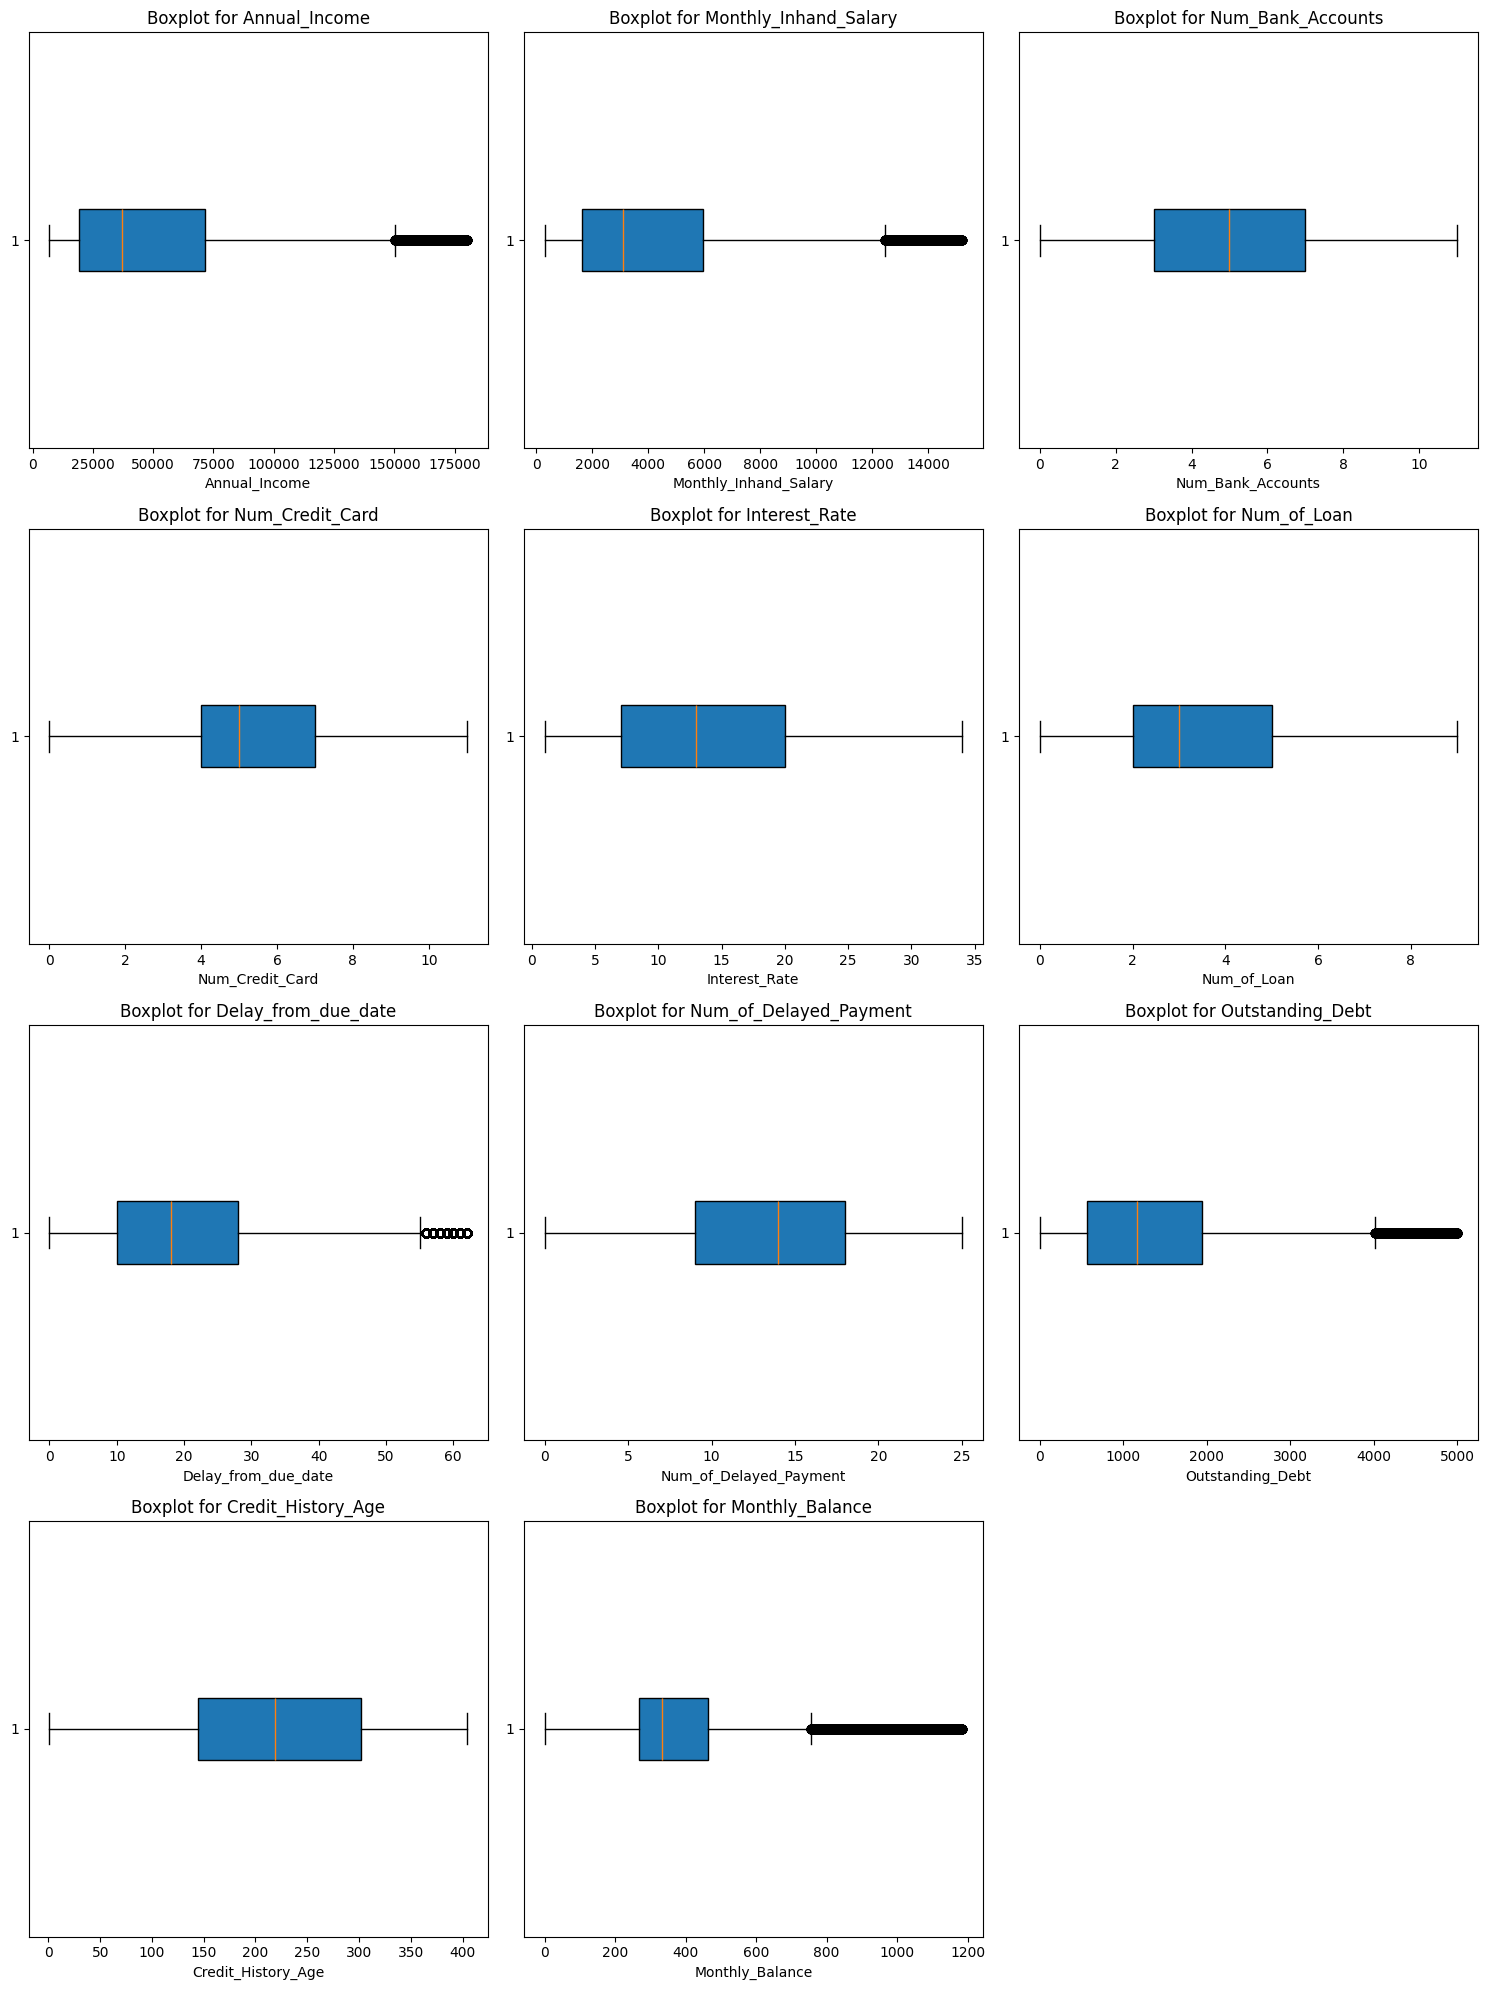

In [132]:
#plot the boxplot to visualize the outliers present or not
# Plot individual boxplots for each numerical feature
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Set up the grid
num_features = len(numerical_cols)
rows = (num_features // 3) + 1  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna(), vert=False, patch_artist=True)
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [133]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Outliers count in each feature:\n", outliers.sum())

Outliers count in each feature:
 Annual_Income             2000
Monthly_Inhand_Salary     2017
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date       4002
Num_of_Delayed_Payment       0
Outstanding_Debt          5272
Credit_History_Age           0
Monthly_Balance           7400
dtype: int64


In [134]:
# Cap outliers using IQR
df = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values to the lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Show the capped dataframe
print(df.head())


   Annual_Income  Monthly_Inhand_Salary  ...  Monthly_Balance  Credit_Score
0       19114.12            1824.843333  ...       312.494089          Good
1       19114.12            1824.843333  ...       284.629162          Good
2       19114.12            1824.843333  ...       331.209863          Good
3       19114.12            1824.843333  ...       223.451310          Good
4       19114.12            1824.843333  ...       341.489231          Good

[5 rows x 13 columns]


In [135]:
# Recheck for outliers after capping or transformation
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify remaining outliers
outliers_after = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Remaining outliers count in each feature:\n", outliers_after.sum())


Remaining outliers count in each feature:
 Annual_Income             0
Monthly_Inhand_Salary     0
Num_Bank_Accounts         0
Num_Credit_Card           0
Interest_Rate             0
Num_of_Loan               0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Outstanding_Debt          0
Credit_History_Age        0
Monthly_Balance           0
dtype: int64


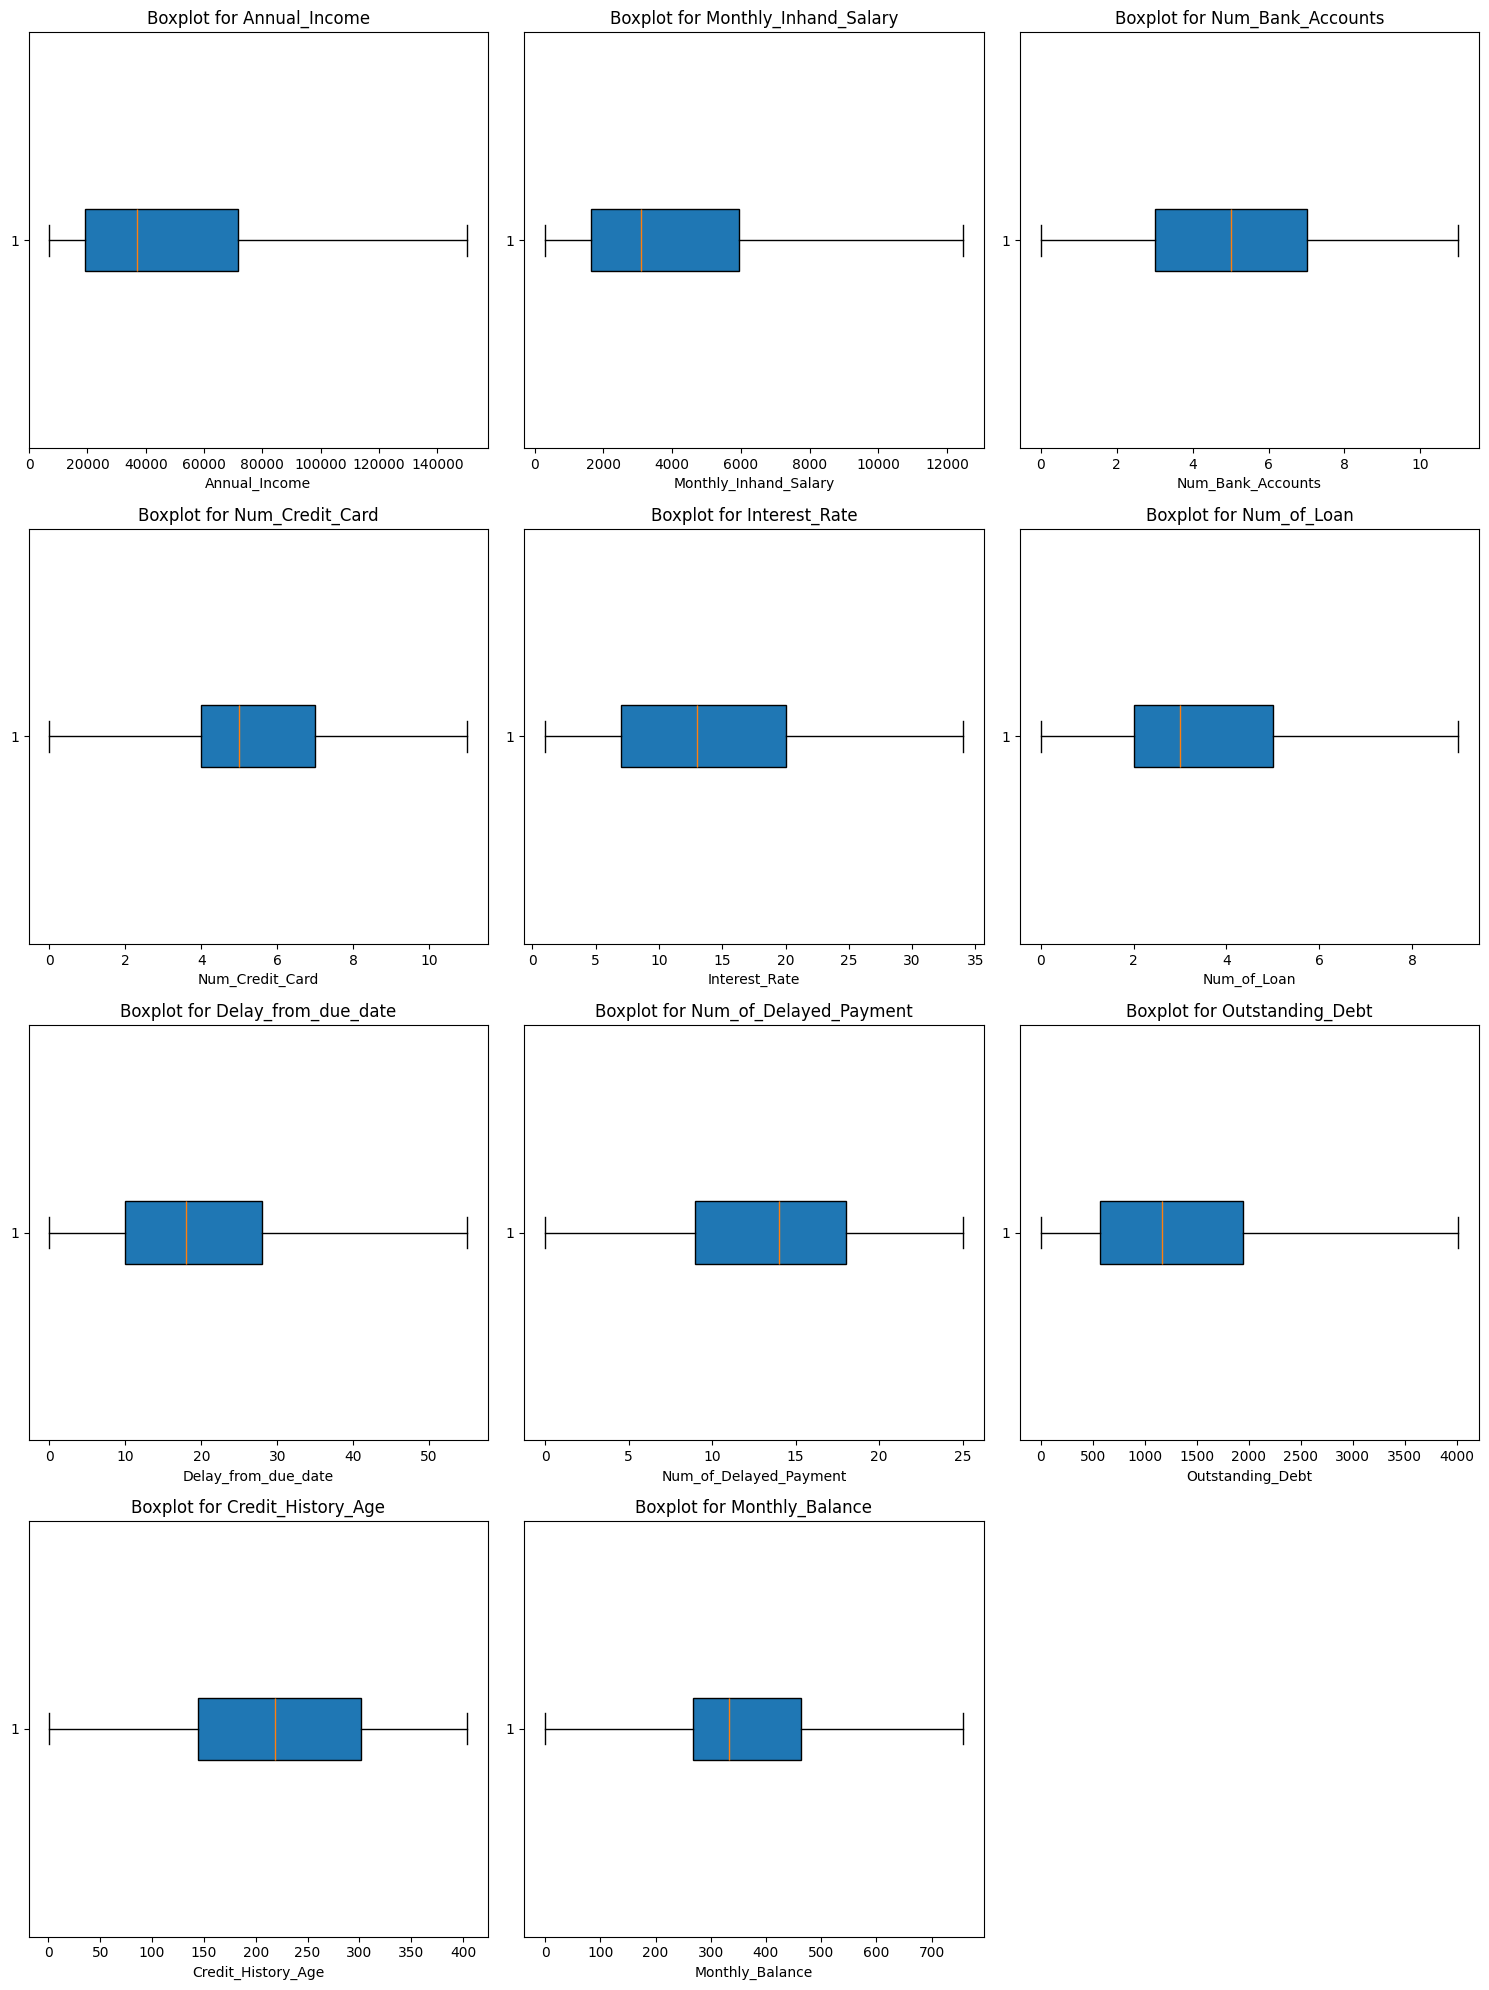

In [136]:
# Plot boxplots again to check for outliers after handling them
num_features = len(numerical_cols)
rows = (num_features // 3) + 1  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna(), vert=False, patch_artist=True)  # Use df_capped if you've applied capping
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


<ipython-input-137-d926f348504f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


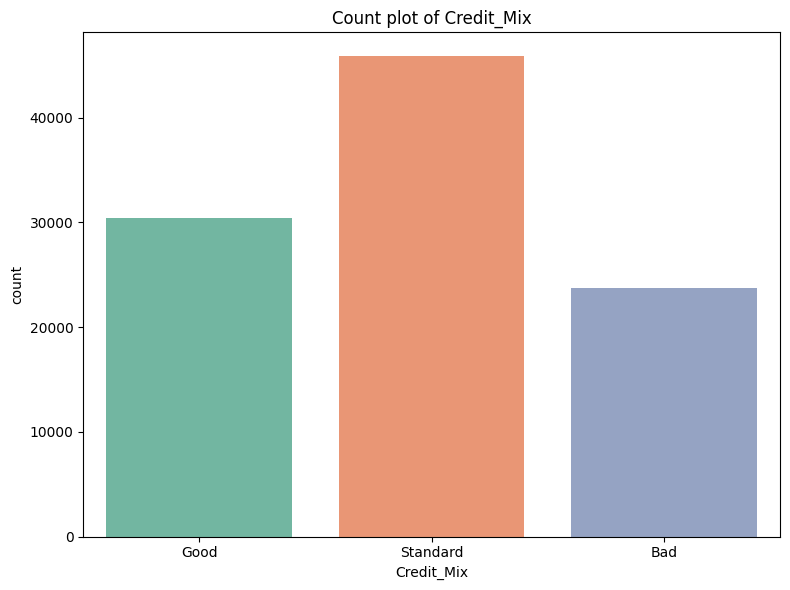

<ipython-input-137-d926f348504f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


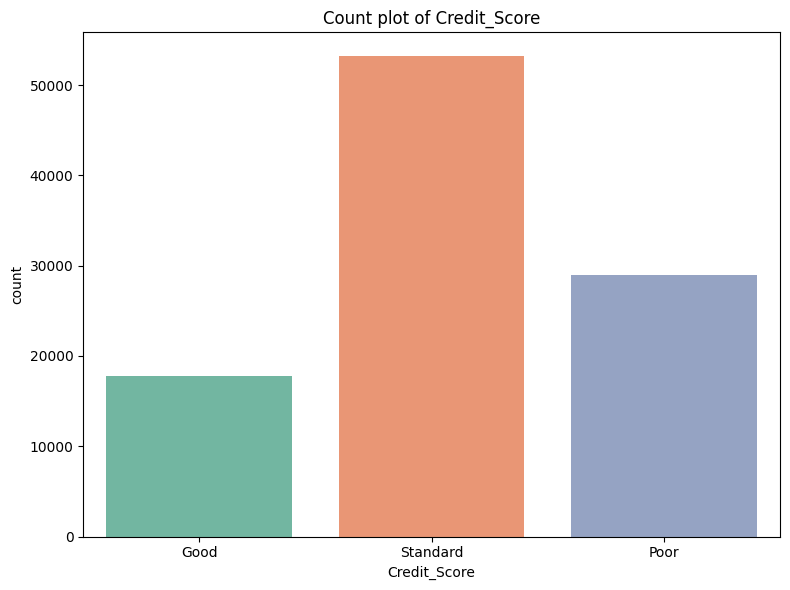

In [137]:
#plot count plots for categorical features
categorical_cols = df.select_dtypes(include = ['object']).columns
for col in categorical_cols :
  plt.figure(figsize = (8,6))
  sns.countplot(x=col, data=df, palette='Set2')
  plt.title(f'Count plot of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.tight_layout()
  plt.show()

<Figure size 1500x1000 with 0 Axes>

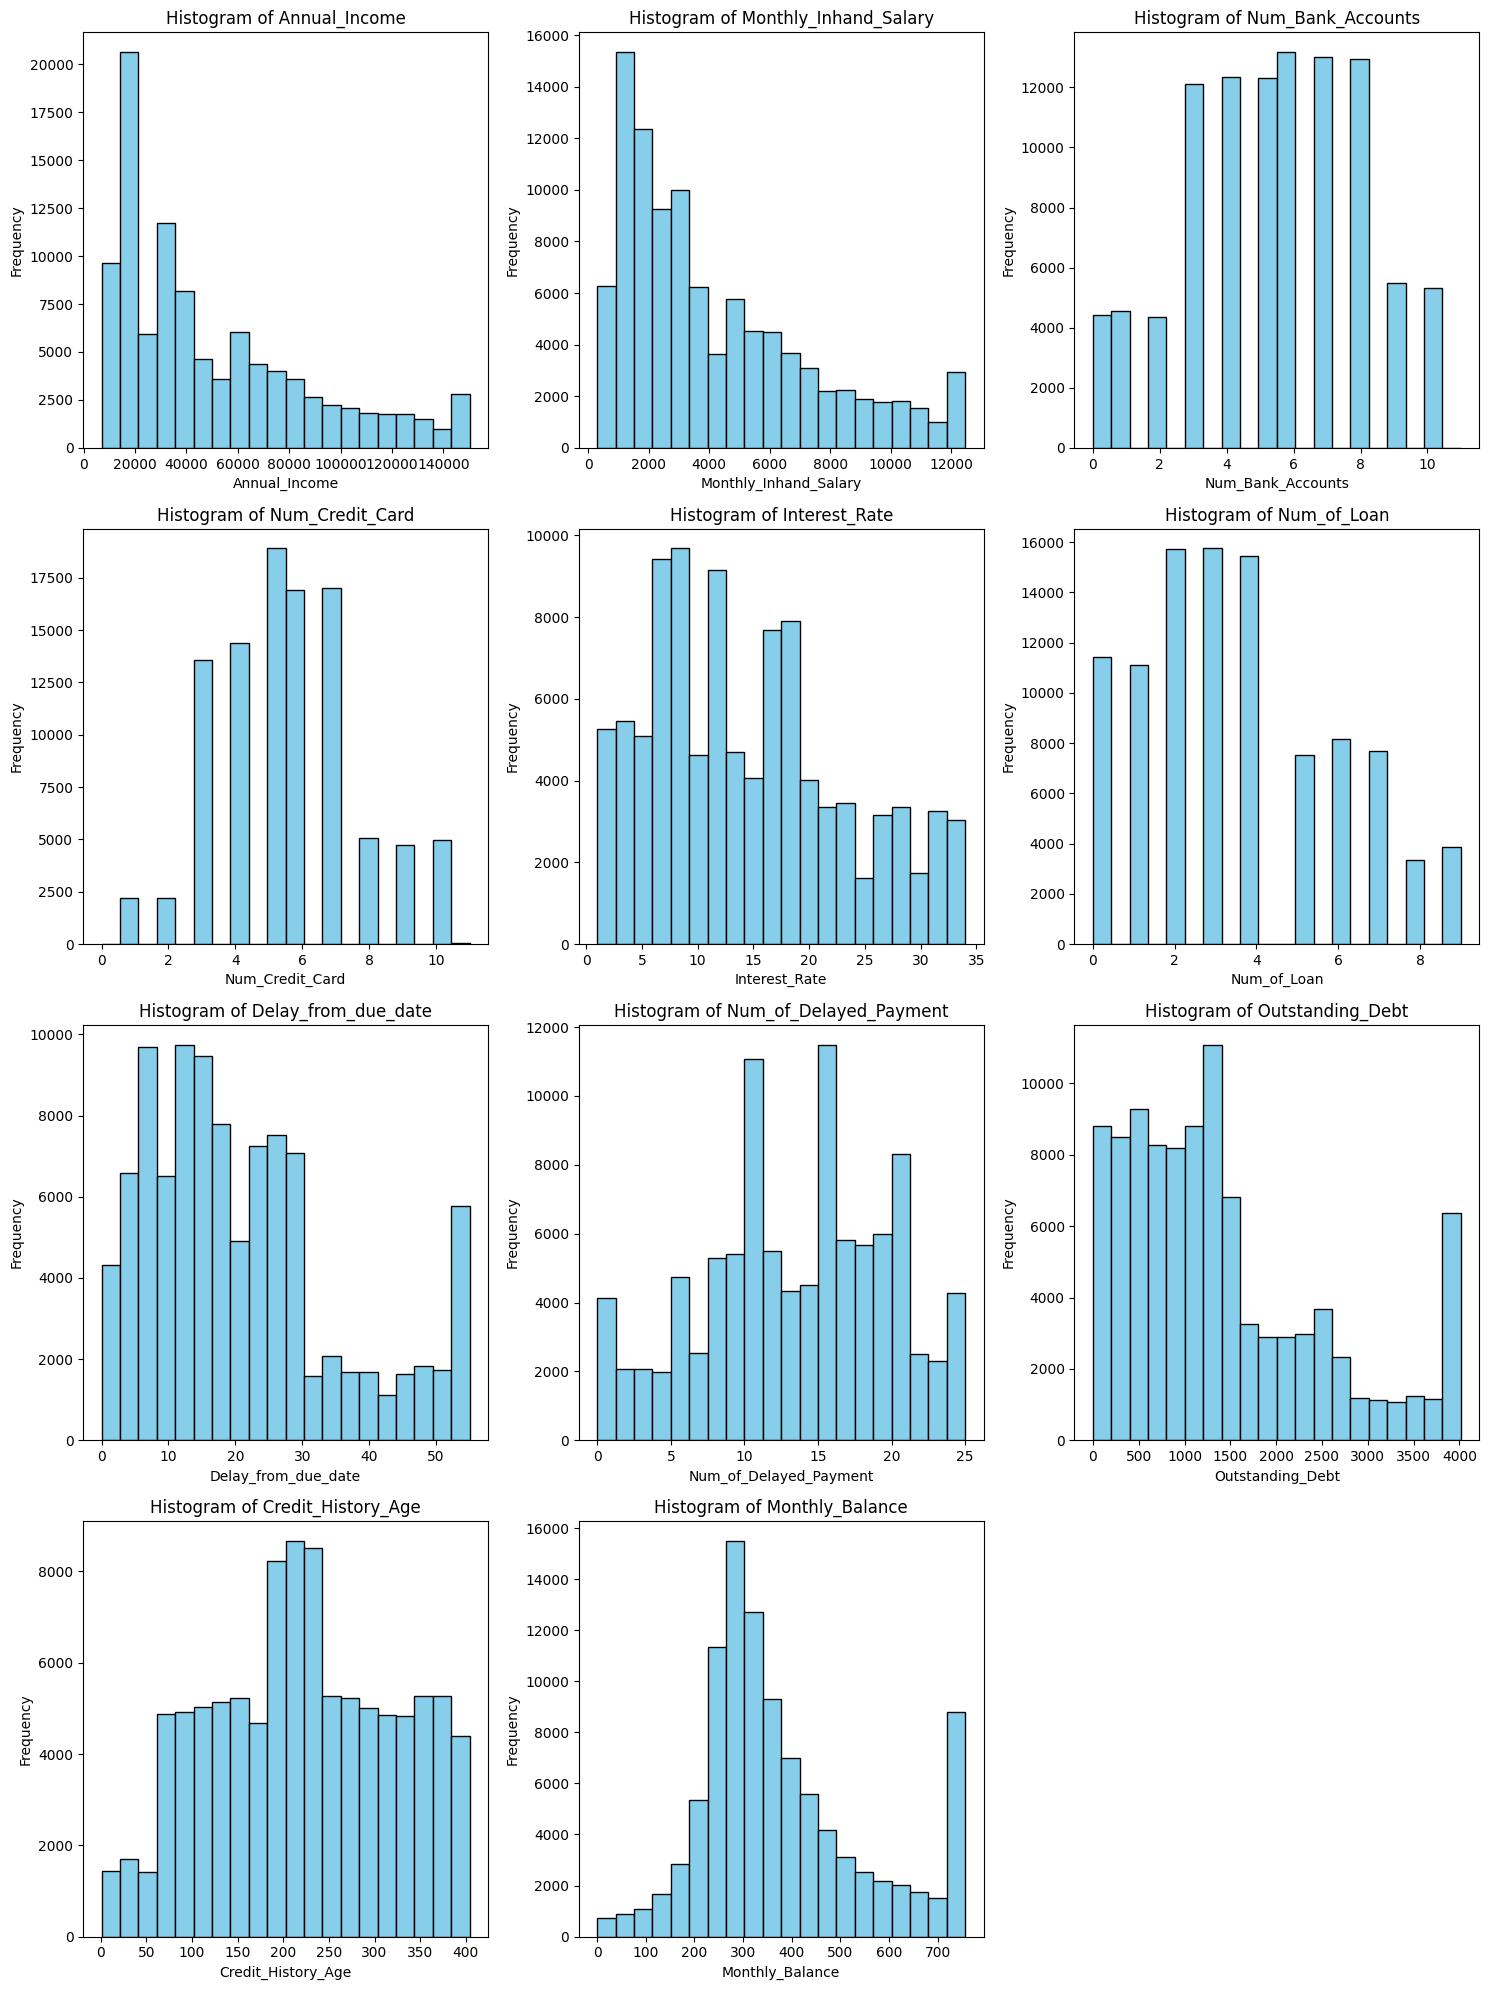

In [138]:
# Plot histogram for numerical features
plt.figure(figsize = (15,10))

#Define number of rows and columns
num_features = len(numerical_cols)
rows = (num_features // 3) +1 #3 plots per row
fig, axes = plt.subplots(rows, 3, figsize = (15, 5 * rows))
axes = axes.flatten()

#plot histogram for each numerical feature
for i, col in enumerate(numerical_cols):
  axes[i].hist(df[col].dropna(), bins = 20, color = 'skyblue', edgecolor = 'black')
  axes[i].set_title(f'Histogram of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Convert the categorical feature into numerical so that can use to train machine learning model

In [139]:
#credit_mix is column is categorical

df['Credit_Mix'] = df['Credit_Mix'].map({
     'Bad' : 0,
    'Standard' : 1,
    'Good' : 2,

})

Split the dataset into x and y

In [140]:
X = df.drop('Credit_Score', axis = True)
X.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,2,809.98,265.0,312.494089
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,2,809.98,266.0,284.629162
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,2,809.98,267.0,331.209863
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,2,809.98,268.0,223.451310
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,2,809.98,269.0,341.489231


In [141]:
y = df['Credit_Score']
y.head()

,Credit_Score
0,Good
1,Good
2,Good
3,Good
4,Good


Split the data into training and testing set

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [143]:
X_train.shape

(80000, 12)

In [144]:
y_train.shape

(80000,)

## Random Forest Classifier



The Random Forest Classifier is a popular machine learning algorithm used for classification tasks. It is based on ensemble learning, where multiple decision trees are trained and combined to improve the model's accuracy and robustness.


In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
model = RandomForestClassifier()

In [147]:
model.fit(X_train, y_train)

RandomForestClassifier()

Make predictions on the test set

In [148]:
y_pred = model.predict(X_test)

In [149]:
y_pred

array(['Good', 'Poor', 'Standard', ..., 'Standard', 'Standard', 'Poor'],
      dtype=object)

#Evaluate the model

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [151]:
#1.Accuracy score
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)

0.8122


In [152]:
#2.Confucsion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[2709   11  807]
 [  13 4904  957]
 [ 754 1214 8631]]


In [153]:
#3.Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        Good       0.78      0.77      0.77      3527
        Poor       0.80      0.83      0.82      5874
    Standard       0.83      0.81      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [154]:
#4. Feature Importance
importances = model.feature_importances_
feature_names = X.columns

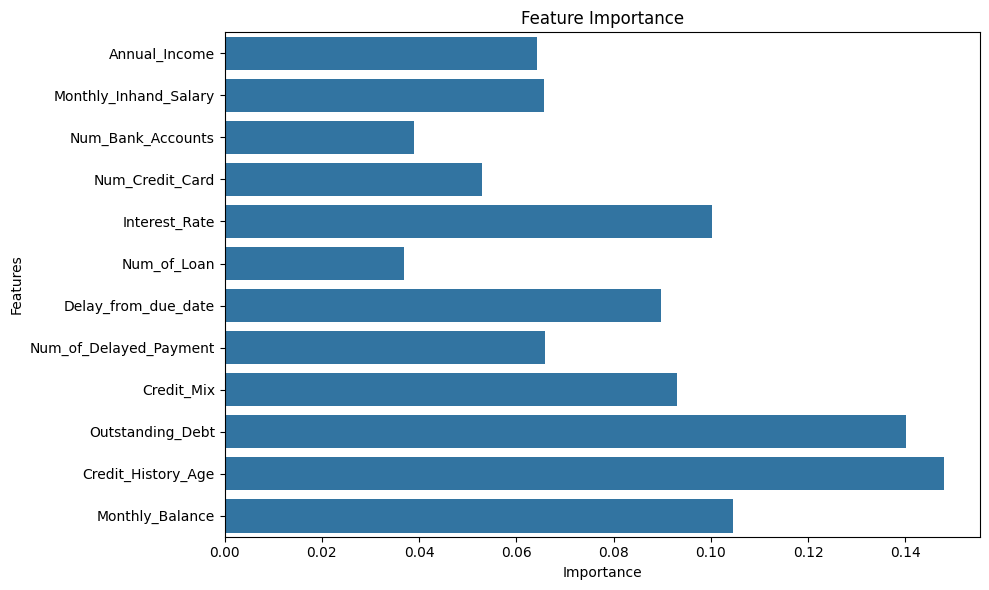

In [155]:
# Plotting the feature importance

plt.figure(figsize = (10, 6))
sns.barplot(x = importances, y = feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#Prediction

In [162]:
# Prediction

print("Credit Score Prediction : ")

a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = int(input("Credit Mix (Bad: 0, Standard: 1, Good: 2): "))  # Ensure it's an integer
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

# Prepare the input as a numpy array
features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])

# Predict the Credit Score
predicted_score = model.predict(features)

# Output the predicted credit score
print('Predicted Credit Score:', predicted_score[0])  # Access the prediction result


Credit Score Prediction : 
Annual Income: 19114.12	
Monthly Inhand Salary: 1824.843333
Number of Bank Accounts: 	3.0
Number of Credit cards: 4.0	
Interest rate: 	3.0	
Number of Loans: 4.0
Average number of days delayed by the person: 	6.0
Number of delayed payments: 	4.0	
Credit Mix (Bad: 0, Standard: 1, Good: 2): 2
Outstanding Debt: 	809.98
Credit History Age: 	269.0
Monthly Balance: 	341.489231
Predicted Credit Score: Good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [166]:
print(df.iloc[4])

Annual_Income                19114.12
Monthly_Inhand_Salary     1824.843333
Num_Bank_Accounts                 3.0
Num_Credit_Card                   4.0
Interest_Rate                     3.0
Num_of_Loan                       4.0
Delay_from_due_date               6.0
Num_of_Delayed_Payment            4.0
Credit_Mix                          2
Outstanding_Debt               809.98
Credit_History_Age              269.0
Monthly_Balance            341.489231
Credit_Score                     Good
Name: 4, dtype: object
